## 作業

In [1]:
! nvidia-smi

Wed Sep  9 11:31:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    23W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
import pandas
google = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/google_comments.xlsx', index_col = 0)

In [20]:
google.head()

,username,score,comment
0,倪依芙,5,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...
1,Mimi龍,4,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...
2,林昌逸,1,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡
3,林幸蓁,5,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...
4,台灣TAXI市區叫車禮車包車約拍找小鄭,5,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...


In [21]:
def convertScore(score):
  if int(score) >= 4:
    return 'good'
  elif int(score) <= 2:
    return 'bad'
  else:
    return 'soso'

In [22]:
google['status'] = google['score'].map(lambda e: convertScore(e))

In [23]:
google.head()

,username,score,comment,status
0,倪依芙,5,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...,good
1,Mimi龍,4,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...,good
2,林昌逸,1,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡,bad
3,林幸蓁,5,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...,good
4,台灣TAXI市區叫車禮車包車約拍找小鄭,5,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...,good


In [24]:
google = google.loc[google['status'].isin(['good', 'bad']),['comment', 'status']]

In [25]:
google.head()

,comment,status
0,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...,good
1,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...,good
2,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡,bad
3,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...,good
4,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...,good


In [26]:
google['status'] = google['status'].replace({'good':1 ,'bad':0})


In [27]:
google.head()

,comment,status
0,起初找不到入口，還以為沒座位，但是原來入口在旁邊樓梯～座位區不大，但是料理很好吃～肉圓的醬微...,1
1,聞名已久，今天特別來現場試試，目前改成點餐機點餐， ⋯⋯更多聞名已久，今天特別來現場試試，目...,1
2,非常生氣服務員的態度😠服務很糟糕，麵都還沒吃完，一起身就把麵收走，擺明趕客人😡😡😡,0
3,內用與外帶有不同的點餐方式內用須至店內使用機台點菜、輸入桌號並付款外帶好像只需在入口處點餐即...,1
4,乾淨衛生，廁所很大在地下室，有免費飲料可以喝，拉麵愛好吃，麻辣豆腐不錯、肉粽不錯，目前吃過很...,1


In [28]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(google, test_size = 0.2, random_state = 42)

In [29]:
train_df.shape

(352, 2)

In [30]:
eval_df.shape

(88, 2)

In [ ]:
! pip install simpletransformers

In [31]:
from simpletransformers.classification import ClassificationModel
model = ClassificationModel('bert', 'bert-base-chinese')

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [32]:
model.train_model(train_df, args = {'overwrite_output_dir': True})

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:304: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [33]:
result, model_output, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [34]:
result

{'eval_loss': 0.15286585078998047,
 'fn': 2,
 'fp': 2,
 'mcc': 0.9083333333333333,
 'tn': 38,
 'tp': 46}

In [35]:
(46 + 38) / (46 + 38 + 2+ 2)

0.9545454545454546

## 機器學習方法

In [36]:
import pandas as pd
df = pd.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/yahoo_movie.xlsx', index_col = 0)

In [37]:
df.head()

,content,stars,title,status
0,"不知道耶! 看完整個無感\r\n有種覺得就是女兒""給蕭""害死了老爸\r\n然後...既然可以...",3,古墓奇兵,soso
1,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5,古墓奇兵,good
2,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5,古墓奇兵,good
3,父女重逢真的很讓人感動，五顆星。,5,古墓奇兵,good
4,劇情雖然老套，但仍拍出新意，古墓能殺人的方式不就是機關和毒，要求亂七八糟的觀眾，你看喪尸片看多了。,4,古墓奇兵,good


In [38]:
import jieba
corpus = []
tags = []
for idx, rec in df[df['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('content'))))
  tags.append(rec.get('status'))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.894 seconds.
Prefix dict has been built successfully.


In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [40]:
y = tags

In [41]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(X,y, test_size = 0.3, random_state = 42)

In [42]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha = 0.01)
clf1.fit(train_x, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [43]:
predicted = clf1.predict(test_x)


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, predicted)

0.7653061224489796

In [47]:
confusion_matrix(test_y, predicted)

array([[ 83,  34],
       [ 35, 142]])

In [59]:
from sklearn.svm import SVC
clf2 = SVC(kernel = 'linear')
clf2.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
predicted2 = clf2.predict(test_x)

In [61]:
accuracy_score(test_y, predicted2)

0.8197278911564626

In [62]:
confusion_matrix(test_y, predicted2)

array([[ 84,  33],
       [ 20, 157]])

## 詞向量方法

In [65]:
import jieba
corpus = []
for e in df['content'].tolist():
    corpus.append(list(jieba.cut(e)))

In [87]:
from gensim.models import word2vec
size = 300  # 產生多少維度 
min_count = 3 # 要算至少出現多少次數的字詞
workers = -1 # 使用多少個core 計算, -1 使用所有的core 進行計算 
window = 10  # 上下文的區間
iter = 1000 # 神經網路訓練的迭代數
sample = 1e-5 # 取樣的數量
model = word2vec.Word2Vec(corpus, 
                          workers = workers,
                          sample = sample,
                          size = size,
                          min_count=min_count,
                          window = window,
                          iter = iter)

In [88]:
import jieba
corpus = []
tags = []
for idx,rec in df[df['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(list(jieba.cut(rec.get('content'))))
  tags.append(rec.get('status'))

In [89]:
model.wv.get_vector('電影')

array([ 1.15098432e-03, -4.61630494e-04, -1.42156336e-04,  1.41329109e-03,
        1.50098780e-03,  1.24037746e-04, -1.93181604e-05, -6.46616449e-04,
       -1.14351198e-04, -1.19567208e-03,  6.01810243e-05, -6.74570503e-04,
        4.11966379e-04,  6.28303605e-05,  1.06625748e-03,  4.50490217e-04,
        3.00748739e-04, -1.07897818e-03,  1.26425002e-04, -7.38563016e-04,
        6.83587452e-04,  5.18099871e-04,  3.78971919e-04,  6.40999584e-04,
       -1.66452327e-03,  4.15951217e-04, -1.50641485e-03,  1.55100622e-03,
       -2.37894801e-06,  2.07796576e-04, -7.62495154e-04,  9.06662201e-04,
       -1.51914859e-03,  8.38680367e-04,  7.93886022e-04, -1.49350066e-03,
        4.55665257e-04, -7.77714537e-04, -1.00177433e-03,  2.25658776e-04,
        5.24649688e-04, -1.19156903e-03,  1.85554469e-04, -5.57899475e-04,
        2.64308677e-04,  8.65479873e-04,  4.80139715e-04,  1.16056704e-03,
        7.48673978e-04, -6.05016889e-04,  7.65006349e-04, -1.28671736e-03,
       -1.10470166e-03, -

In [91]:
import numpy as np
x = []
y = []
size = 300
for tag, s in zip(tags, corpus):
    vec = np.zeros(size).reshape((1, size))
    cnt = 0
    for w in s:
        if w in model:
            vec += model.wv.get_vector(w)
            cnt += 1
    if cnt > 0:
      x.append(vec / cnt)
      y.append(tag)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if __name__ == '__main__':


In [92]:
x = np.concatenate(x, axis = 0)

In [93]:
x.shape

(968, 300)

In [94]:
len(y)

968

In [95]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3, random_state = 42)


In [96]:
from sklearn.svm import SVC
clf3 = SVC(kernel = 'rbf')
clf3.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [97]:
predicted3 = clf3.predict(test_x)

In [98]:
accuracy_score(test_y, predicted3)

0.7079037800687286

In [99]:
confusion_matrix(test_y, predicted3)

array([[ 57,  66],
       [ 19, 149]])

## BERT

In [100]:
df.head()

,content,stars,title,status
0,"不知道耶! 看完整個無感\r\n有種覺得就是女兒""給蕭""害死了老爸\r\n然後...既然可以...",3,古墓奇兵,soso
1,很好看的動作片，不會浪費錢跟時間。很久沒有這樣的探險片。可說是女版的印第安那瓊。女主角跟爸爸...,5,古墓奇兵,good
2,說這個不好看的話，那我還真不知道，還有什麼片是您可以去看得了。電影好看，但話說羅拉有裝可以撿...,5,古墓奇兵,good
3,父女重逢真的很讓人感動，五顆星。,5,古墓奇兵,good
4,劇情雖然老套，但仍拍出新意，古墓能殺人的方式不就是機關和毒，要求亂七八糟的觀眾，你看喪尸片看多了。,4,古墓奇兵,good


In [101]:
df2 =  df.loc[df['status'].isin(['good', 'bad']), ['content', 'status']]

In [105]:
df2['status'] = df2['status'].replace({'good':1,'bad':0})

In [106]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(df2, test_size = 0.3, random_state = 42)

In [107]:
from simpletransformers.classification import ClassificationModel
clf4 = ClassificationModel('bert', 'bert-base-chinese')

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [108]:
clf4.train_model(train_df, args = {'overwrite_output_dir': True})

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:304: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [109]:
result, model_output, wrong_predictions = clf4.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [110]:
result

{'eval_loss': 0.473959533950767,
 'fn': 40,
 'fp': 20,
 'mcc': 0.5917496255271791,
 'tn': 97,
 'tp': 137}

In [111]:
(137 + 97) / (137 + 97 + 20 + 40)

0.7959183673469388

In [114]:
#    留存 流失
#留存 900 100
#流失 100 900
print(500 * 24 * 100)
print(100 * 2000)

1200000
200000


## 模型驗證

In [123]:
import pandas as pd
df = pd.read_excel('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/yahoo_movie.xlsx', index_col = 0)

In [124]:
import jieba
corpus = []
tags = []
for idx, rec in df[df['status'].isin(['good', 'bad'])].iterrows():
  corpus.append(' '.join(jieba.cut(rec.get('content'))))
  tags.append(rec.get('status'))

In [125]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [126]:
y = tags

In [165]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(X,y, test_size = 0.3, random_state = 42)

In [128]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha = 0.01)
clf1.fit(train_x, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [129]:
predicted1 = clf1.predict(test_x)

In [130]:
# word2vec f1 score
from sklearn.metrics import classification_report
print(classification_report(test_y, predicted1))

              precision    recall  f1-score   support

         bad       0.70      0.71      0.71       117
        good       0.81      0.80      0.80       177

    accuracy                           0.77       294
   macro avg       0.76      0.76      0.76       294
weighted avg       0.77      0.77      0.77       294



In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha = 0.01)

In [134]:
scores = cross_val_score(clf1, X = X, y = y, cv = 10)

In [135]:
scores.mean()

0.7408163265306122

In [136]:
scores.std()

0.07160328486877075

In [137]:
from sklearn.svm import SVC
clf2 = SVC(kernel = 'linear')

In [139]:
scores2 = cross_val_score(clf2, X = X, y = y, cv = 10)

In [140]:
scores2.mean()

0.7918367346938775

In [141]:
scores2.std()

0.04357991123278086

## ROC Curve

In [145]:
clf1.fit(train_x, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [166]:
#clf1.predict(test_x)
predicted_proba_1 = clf1.predict_proba(test_x)

In [176]:
pred_y = (predicted_proba_1[:,1] > 0.5).astype('int')

In [177]:
import numpy as np
test_y2 = np.array([1 if e == 'good' else 0 for e in test_y])

In [178]:
m = confusion_matrix(test_y2, pred_y)

In [179]:
m

array([[ 83,  34],
       [ 35, 142]])

In [180]:
TP = m[0,0]
FP = m[0,1]
FN = m[1,0]
TN = m[1,1]

TPR = TP / (TP + FN )
FPR = FP / (FP + TN)

In [191]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y2,clf1.predict_proba(test_x)[:,1])

In [192]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.8399729586170265

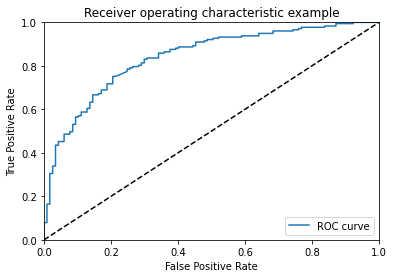

In [183]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [184]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB(alpha = 0.01)
clf1.fit(train_x, train_y)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [187]:
from sklearn.svm import SVC
clf2 = SVC(kernel = 'linear', probability=True)
clf2.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

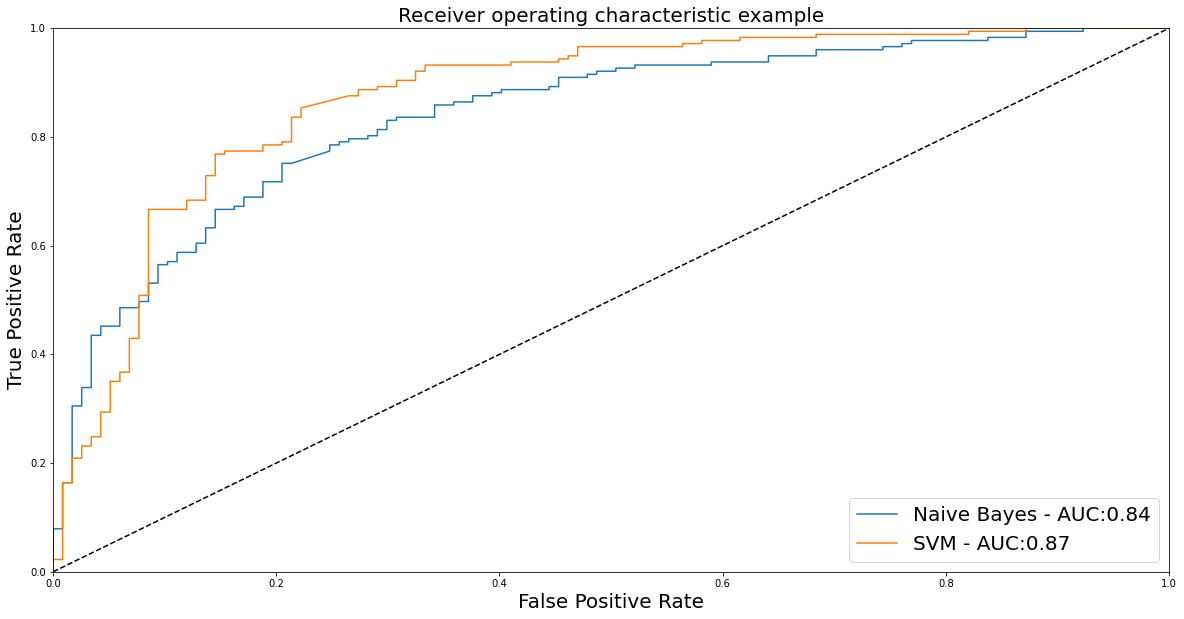

In [190]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2], ['Naive Bayes', 'SVM']):
  probas_ = clf.fit(train_x, train_y).predict_proba(test_x)
  test_y2 = np.array([1 if e == 'good' else 0 for e in test_y])
  fpr, tpr, thresholds = roc_curve(test_y2, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [193]:
df2 =  df.loc[df['status'].isin(['good', 'bad']), ['content', 'status']]

In [194]:
df2['status'] = df2['status'].replace({'good':1,'bad':0})

In [195]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(df2, test_size = 0.3, random_state = 42)

In [196]:
from simpletransformers.classification import ClassificationModel
clf4 = ClassificationModel('bert', 'bert-base-chinese')

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [197]:
clf4.train_model(train_df, args = {'overwrite_output_dir': True})

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:304: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [198]:
result, model_output, wrong_predictions = clf4.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [199]:
result

{'eval_loss': 0.39818312046495646,
 'fn': 28,
 'fp': 20,
 'mcc': 0.6642294282918645,
 'tn': 97,
 'tp': 149}

In [202]:
fpr2, tpr2, threshold2 = roc_curve(eval_df['status'], model_output[:,1])

In [203]:
auc(fpr2, tpr2)

0.9031097590419624

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:776: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


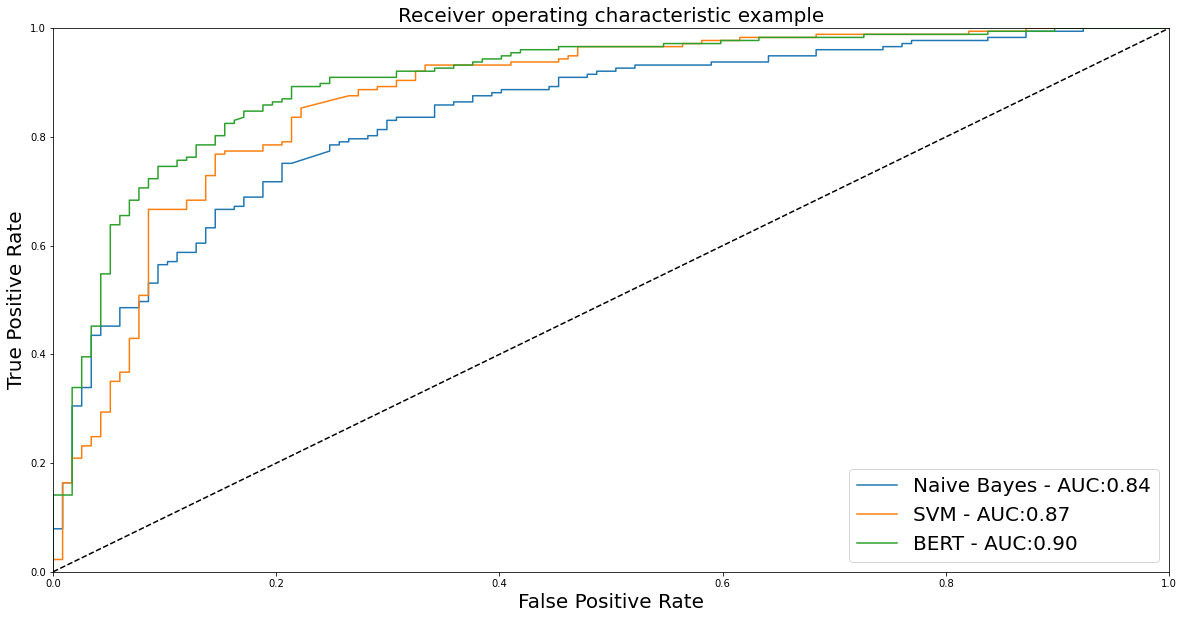

In [204]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2, clf4], ['Naive Bayes', 'SVM', 'BERT']):
  if title != 'BERT':
    probas_ = clf.fit(train_x, train_y).predict_proba(test_x)
    test_y2 = np.array([1 if e == 'good' else 0 for e in test_y])
    fpr, tpr, thresholds = roc_curve(test_y2, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
  else:
    # BERT MODEL
    result, model_output, wrong_predictions = clf4.eval_model(eval_df)
    fpr2, tpr2, threshold2 = roc_curve(eval_df['status'], model_output[:,1])
    plt.plot(fpr2, tpr2, label='%s - AUC:%.2f'%(title, auc(fpr2, tpr2)) )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 超參數調整
- https://scikit-learn.org/stable/modules/grid_search.html

In [205]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [206]:
from sklearn.model_selection import GridSearchCV
clf2 = SVC()

search = GridSearchCV(clf2, param_grid, cv=5)
search.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [207]:
search.best_params_

{'C': 1, 'kernel': 'linear'}

In [209]:
search.best_score_

0.7682323072040622

In [211]:
#search.best_estimator_.predict(test_x)

## 模型保存

In [212]:
## sklearn
## https://scikit-learn.org/stable/modules/model_persistence.html
from joblib import dump, load
dump(clf1, 'clf1.joblib')

['clf1.joblib']

In [213]:
clf_new1 = load('clf1.joblib') 

In [215]:
#clf_new1.predict(test_x)

In [220]:
## BERT
clf4.save_model('bert_movie')


In [223]:
from simpletransformers import model
clf4.save_model("bert_movie", model=clf4.model)

In [224]:
model_new_bert = ClassificationModel(
    "bert", "bert_movie"
)

## Overfitting

In [225]:
from sklearn.datasets import load_iris
iris = load_iris()

In [226]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
from sklearn import tree
tree.export_graphviz(clf1, 'clf1.dot')

In [229]:
! cat clf1.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

In [ ]:
# http://www.webgraphviz.com/

In [231]:
pred_y = clf1.predict(iris.data)
accuracy_score(iris.target, pred_y)

1.0

## Regularization
- https://github.com/ywchiu/holintech/blob/master/Ridge_Lasso.ipynb
- https://github.com/ywchiu/holintech/blob/master/Demo20181222.ipynb

In [237]:
from google.colab import drive 
import os
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHYa-0p22gya3WPUDWaj65v4KN_DCq0c-Qf94oUPhVaHp52nePg0I4
Mounted at /content/drive


In [238]:
! cp clf1.joblib /content/drive/My\ Drive/aidataset/

In [ ]:
! cp /content/drive/My\ Drive/aidataset/clf1.joblib  ./

In [ ]:
! gdown https://drive.google.com/file/d/1gsGB2ruJBX-po_guSpi7E5n5krvEcT0G/view?usp=sharing

In [239]:
 ! gdown https://drive.google.com/uc?id=1gsGB2ruJBX-po_guSpi7E5n5krvEcT0G

Downloading...
From: https://drive.google.com/uc?id=1gsGB2ruJBX-po_guSpi7E5n5krvEcT0G
To: /content/clf1.joblib
100% 190k/190k [00:00<00:00, 57.9MB/s]
